In [1]:
import armory.utils 
import armory.evaluation  
import armory.engine 
import wp_yolov4 as wp_model 

from pprint import pprint
from pytorch_yolo import darknet2pytorch

from armory.model.object_detection.yolov4_object_detector import YoloV4ObjectDetector  
from armory.examples.utils.display import display_object_detection_results

import warnings
warnings.filterwarnings("ignore")

In [2]:
import armory.utils 
import armory.evaluation  
import armory.engine 
import wp_yolov4 as wp_model 

from pprint import pprint
from pytorch_yolo import darknet2pytorch

from armory.model.object_detection.yolov4_object_detector import YoloV4ObjectDetector  
from armory.examples.utils.display import display_object_detection_results

import warnings
warnings.filterwarnings("ignore")

## Global Variables

In [3]:
root = '/encrypted/jcronay/gard-wp/'

cfg_path = f'{root}/data/wp_models/yolov4-custom_wp.cfg'
weights_path = f'{root}/data/wp_models/yolov4-custom_final_plus.weights'
torch_path = f'{root}/data/wp_models/pth_files/yolov4-custom_final_plus.pth'

In [4]:
batch_size = 2
num_batches = 2

## Load Model

In [5]:
_, model_infer = wp_model.load_model(
    cfg_path, 
    is_weights_file=True, 
    weights_path=weights_path
)

In [6]:
armory_model = YoloV4ObjectDetector(
    name="YOLOv4",
    model=model_infer
)

## Setup Data + Metrics

In [7]:
opts_benign_data = {
    "data_dir": "/encrypted/jcronay/gard-wp/data/hallucination_dataset_benign",
    "width": 78,
    "height": 34,
    "batch_size": batch_size
}

opts_adv_data = {
    "data_dir": "/encrypted/jcronay/gard-wp/data/hallucination_dataset_adv",
    "width": 78,
    "height": 34,
    "batch_size": batch_size
}

opts_patch = {
    "x_patch_dim": 36,
    "y_patch_dim": 48
}

In [8]:
bengin_dataset = wp_model.load_dataset(opts_benign_data, opts_patch)
adv_dataset = wp_model.load_dataset(opts_adv_data, opts_patch)
metrics = wp_model.create_metrics()
exporters = wp_model.create_exporters(export_every_n_batches=1)

2024-04-11 20:25:07  2s WARNING  armory.track:_wrapper:175 Parameters with prefix ObjectDetectionDataLoader have already been logged and will be overwritten. Use a unique prefix or start a new tracking context with `tracking_context` to avoid this warning.


## Benign Evaluation

In [9]:
evaluation = armory.evaluation.Evaluation(
    name="object-detection-wp-model",
    description="Object detection of the WP model.",
    author="TwoSix",
    dataset=bengin_dataset,
    model=armory_model,
    perturbations={
        "benign": []
    },
    metrics=metrics,
    exporters=exporters,
)

In [10]:
engine = armory.engine.EvaluationEngine(
    evaluation,
    limit_test_batches=num_batches,
    devices=1
)

INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs


In [11]:
results = engine.run()

2024/04/11 20:25:07 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Testing: |                                                                                                    …


Evaluating benign:   0%|                                                                                                                                                         | 0/1 [00:00<?, ?it/s]

None



Evaluating benign: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]
                                                                                                                                                                                                       
Evaluating benign:   0%|                                                                                                                                                         | 0/1 [00:00<?, ?it/s]

None



Evaluating benign: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]
                                                                                                                                                                                                       

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Test metric                  ┃                 DataLoader 0                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   benign/detection/disappearance_rate_mean   │                     0.0                      │
│     benign/detection/hallucinations_mean     │                     0.0                      │
│ benign/detection/misclassification_rate_mean │                     0.0                      │
│   benign/detection/true_positive_rate_mean   │                     0.0                      │
│               benign/linf_norm               │                     0.0                      │
│                benign/map/map                │                     -1.0                     │
│              benign/map/map_50               │                     -1.0                     │
│              benign/map/map_75               │                     -1.0                     │
│             benign/map/map_large             │                     -1.0                     │
│            benign/map/map_medium             │                     -1.0                     │
│           benign/map/map_per_class           │                     -1.0                     │
│             benign/map/map_small             │                     -1.0                     │
│               benign/map/mar_1               │                     -1.0                     │
│              benign/map/mar_10               │                     -1.0                     │
│              benign/map/mar_100              │                     -1.0                     │
│         benign/map/mar_100_per_class         │                     -1.0                     │
│             benign/map/mar_large             │                     -1.0                     │
│            benign/map/mar_medium             │                     -1.0                     │
│             benign/map/mar_small             │                     -1.0                     │
└──────────────────────────────────────────────┴──────────────────────────────────────────────┘

2024/04/11 20:25:09 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2024/04/11 20:25:09 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


## Adversarial Evaluation

In [12]:
evaluation = armory.evaluation.Evaluation(
    name="object-detection-wp-model",
    description="Object detection of the WP model.",
    author="TwoSix",
    dataset=adv_dataset, 
    model=armory_model,
    perturbations={
        "attack": []
    },
    metrics=metrics,
    exporters=exporters,
)

In [13]:
engine = armory.engine.EvaluationEngine(
    evaluation,
    limit_test_batches=num_batches,
    devices=1
)

INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs


In [14]:
results = engine.run()

2024-04-11 20:25:10  6s WARNING  armory.track:track_param:65 Parameter Armory.version has already been logged with value 24.2.post71+g542c74d6.d20240410, and will be overwritten with value 24.2.post71+g542c74d6.d20240410. Use a unique parameter key argument or start a new tracking context with `tracking_context` to avoid this warning.


2024/04/11 20:25:10 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


Testing: |                                                                                                    …


Evaluating attack:   0%|                                                                                                                                                         | 0/1 [00:00<?, ?it/s]

None



Evaluating attack: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]
                                                                                                                                                                                                       
Evaluating attack:   0%|                                                                                                                                                         | 0/1 [00:00<?, ?it/s]

None



Evaluating attack: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.35it/s]
                                                                                                                                                                                                       

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Test metric                  ┃                 DataLoader 0                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   attack/detection/disappearance_rate_mean   │                     0.0                      │
│     attack/detection/hallucinations_mean     │                     1.0                      │
│ attack/detection/misclassification_rate_mean │                     0.0                      │
│   attack/detection/true_positive_rate_mean   │                     0.0                      │
│               attack/linf_norm               │                     0.0                      │
│              attack/map/classes              │                     0.0                      │
│                attack/map/map                │                     -1.0                     │
│              attack/map/map_50               │                     -1.0                     │
│              attack/map/map_75               │                     -1.0                     │
│             attack/map/map_large             │                     -1.0                     │
│            attack/map/map_medium             │                     -1.0                     │
│           attack/map/map_per_class           │                     -1.0                     │
│             attack/map/map_small             │                     -1.0                     │
│               attack/map/mar_1               │                     -1.0                     │
│              attack/map/mar_10               │                     -1.0                     │
│              attack/map/mar_100              │                     -1.0                     │
│         attack/map/mar_100_per_class         │                     -1.0                     │
│             attack/map/mar_large             │                     -1.0                     │
│            attack/map/mar_medium             │                     -1.0                     │
│             attack/map/mar_small             │                     -1.0                     │
└──────────────────────────────────────────────┴──────────────────────────────────────────────┘

2024/04/11 20:25:12 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2024/04/11 20:25:12 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


## Display Results

In [16]:
display_object_detection_results(
    run_id=engine.run_id,
    batch_idx=0,
    batch_size=batch_size,
    chains=["benign", "attack"],
)

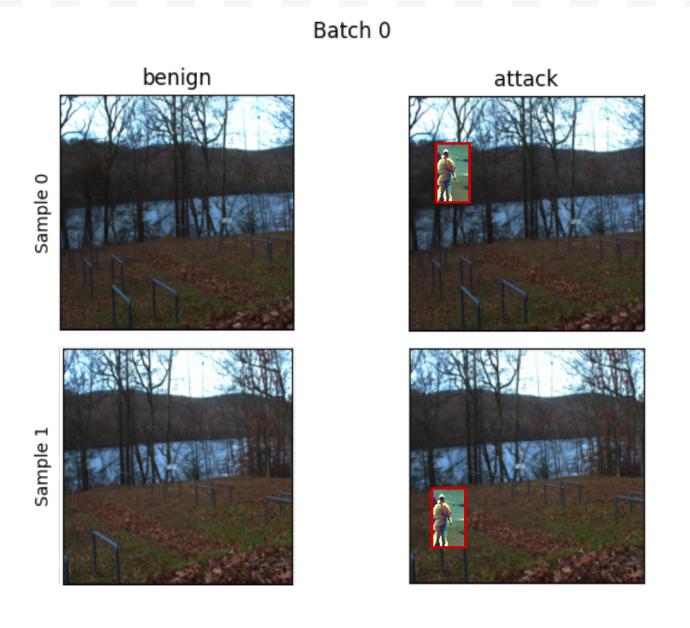